# DSE Course 1, Lab 3 Alternate: Practice with Statistical Methods

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

<br>

---

<br>

In this lab we will continue to practice with the regression models we've covered: Linear, log, lasso and ridge regression

<br>

---




In [1]:
# Pandas library for the pandas dataframes
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import random
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
      "ds_for_engineers/main/data/wine_quality/winequalityN.csv")

df.columns = df.columns.str.replace(' ', '_')

# L3 Q1: Number and Choice of Input Features for Linear Regression

* Load the red wine dataset and evaluate how the linear regression predictions changes as you change the **number and choice of input features**. The total number of columns in X  is 11 and each column represent a specific input feature. 

* Make at least 3 variations of the model with different features selected, calculate the MSE and R2 of each one

**_dependent variable: density_**

**_dataset: white wines_**



In [3]:
from itertools import combinations
from sklearn.linear_model import LinearRegression

In [4]:
# prep the dataframe
white = df.loc[df['type'] == 'white']
white = white.dropna(axis=0)

# prep the model
model = LinearRegression()

In [5]:
# define the train/test sets and total features
target = 'density'
features = list(white.columns)
features.remove('type')
features.remove(target)
X = white[features].values
y = white[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state=42)

In [7]:
def find_best(combos=2, scorefn=metrics.r2_score, model=LinearRegression()):
  """
  Finds the best features to include of the total feature set given a set number
  of features to include

  Parameters
  ----------
  combos: int
    the set number of features to include in the model
  scorefn: sklearn metric
    the sklearn metric to track for evaluation, will be ran with 
    (y_pred, y_true)
  model: sklearn model
    the sklearn model train and make predictions

  Returns
  ----------
  str_best: list of str
    the list of features included in the best model
  best: list of int
    the numeric encoding of the features to include
  score: float
    the R2 of the model on the test set
  ar2: float
    the Adjusted R2 of the model on the test set
  """
  res = []
  for i in combinations(range(len(features)), combos):

    # select the desired features
    Xl_train = X_train[:,i]
    Xl_test = X_test[:,i]

    # fit the model
    model.fit(Xl_train, y_train)

    # calculate the performance
    y_pred = model.predict(Xl_test)
    r2 = scorefn(y_pred, y_test)

    # we calculate the adjusted_r_squared to compare across models with
    # different numbers of features
    ar2 = 1 - (1-r2)*(len(y_pred)-1)/(len(y_pred)-Xl_train.shape[1]-1) 

    res.append([r2,i,ar2])
  
  # sort the results and select the best based on R2
  resdf = pd.DataFrame(res, columns=['r2', 'features', 'ar2'])\
    .sort_values('r2', ascending=False).reset_index(drop=True)
  best = list(resdf.iloc[0,1])
  str_best = list(np.array(features)[best])
  score = resdf.iloc[0,0]
  ar2 = resdf.iloc[0,2]
  return str_best, best, score, ar2

In [8]:
best_combos = []
for i in range(1,len(features)):
  best_combos.append(find_best(i))

In [9]:
res = pd.DataFrame(best_combos, columns=['Features', 'Feature Code', 'R2', 'Adjusted R2'])
res

,Features,Feature Code,R2,Adjusted R2
0,[residual_sugar],[3],0.570486,0.570044
1,"[residual_sugar, alcohol]","[3, 9]",0.920060,0.919895
2,"[fixed_acidity, residual_sugar, alcohol]","[0, 3, 9]",0.941501,0.941320
3,"[fixed_acidity, residual_sugar, pH, alcohol]","[0, 3, 7, 9]",0.971066,0.970947
4,"[fixed_acidity, residual_sugar, pH, sulphates,...","[0, 3, 7, 8, 9]",0.975086,0.974958
5,"[fixed_acidity, residual_sugar, total_sulfur_d...","[0, 3, 6, 7, 8, 9]",0.976698,0.976553
6,"[fixed_acidity, residual_sugar, chlorides, tot...","[0, 3, 4, 6, 7, 8, 9]",0.977719,0.977557
7,"[fixed_acidity, residual_sugar, chlorides, tot...","[0, 3, 4, 6, 7, 8, 9, 10]",0.978288,0.978108
8,"[fixed_acidity, residual_sugar, chlorides, fre...","[0, 3, 4, 5, 6, 7, 8, 9, 10]",0.978702,0.978504
9,"[fixed_acidity, volatile_acidity, residual_sug...","[0, 1, 3, 4, 5, 6, 7, 8, 9, 10]",0.978748,0.978527


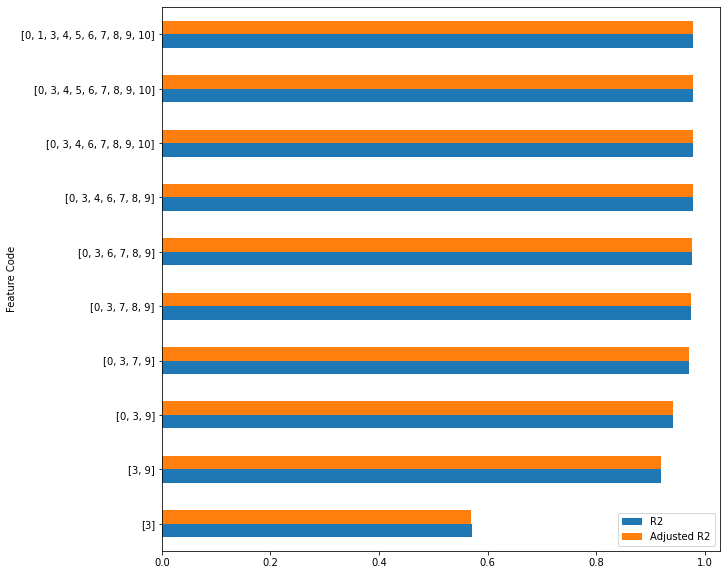

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
res.index = res['Feature Code']
res.plot(kind='barh', ax=ax)

# L3 Q2: Logistic Regression for Categorical Dependent Variables

Perform **_logistic regression_** to predict the type of wine. You may use any combination of features.

**_dependent variable: wine type_**

**_dataset: all wines_**

In [ ]:
# prep the dataframe
df = df.dropna(0)

# prep the model
model = LogisticRegression()

In [ ]:
# define the train/test sets and total features
target = 'type'
features = list(df.columns)
features.remove(target)
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state=42)

The default 'lbfgs' solver had trouble converging to we choose a different one:

In [ ]:
# logistic regression solvers
# 'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solver

In [ ]:
best_combos = []
for i in range(1,len(features)):
  best_combos.append(find_best(i, 
                               scorefn=metrics.accuracy_score, 
                               model=LogisticRegression(solver='liblinear')))

In [ ]:
res = pd.DataFrame(best_combos, columns=['Features', 'Feature Code', 'Accuracy', 'Adjusted Accuracy'])
res

,Features,Feature Code,Accuracy,Adjusted Accuracy
0,[total_sulfur_dioxide],[6],0.924207,0.924149
1,"[volatile_acidity, total_sulfur_dioxide]","[1, 6]",0.959783,0.959721
2,"[volatile_acidity, total_sulfur_dioxide, sulph...","[1, 6, 9]",0.967517,0.967442
3,"[volatile_acidity, total_sulfur_dioxide, sulph...","[1, 6, 9, 10]",0.980665,0.980605
4,"[fixed_acidity, volatile_acidity, total_sulfur...","[0, 1, 6, 9, 10]",0.982985,0.982919
5,"[fixed_acidity, volatile_acidity, total_sulfur...","[0, 1, 6, 8, 9, 10]",0.983759,0.983683
6,"[fixed_acidity, volatile_acidity, chlorides, t...","[0, 1, 4, 6, 8, 9, 10]",0.983759,0.983670
7,"[fixed_acidity, volatile_acidity, free_sulfur_...","[0, 1, 5, 6, 8, 9, 10, 11]",0.983759,0.983658
8,"[fixed_acidity, volatile_acidity, residual_sug...","[0, 1, 3, 5, 6, 7, 8, 9, 10]",0.984532,0.984424
9,"[fixed_acidity, volatile_acidity, residual_sug...","[0, 1, 3, 4, 5, 6, 8, 9, 10, 11]",0.984532,0.984411


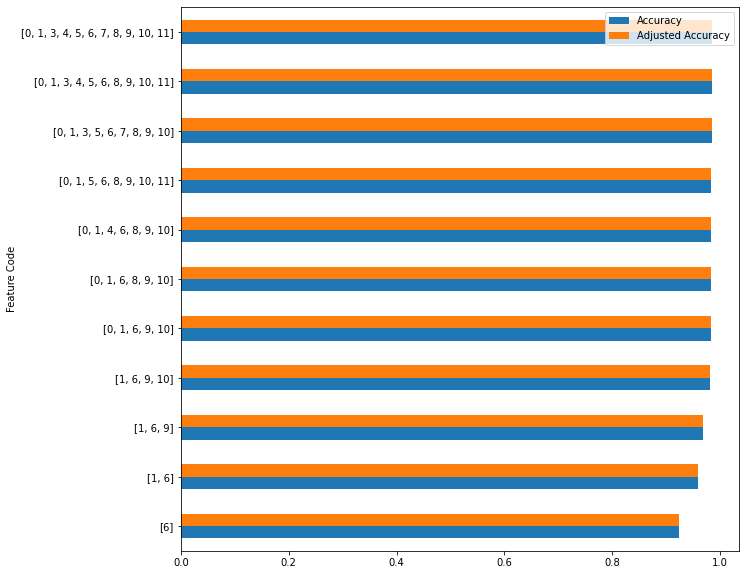

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
res.index = res['Feature Code']
res.plot(kind='barh', ax=ax)

In [ ]:
res.reset_index(drop=True).iloc[3]['Features']

['volatile_acidity', 'total_sulfur_dioxide', 'sulphates', 'alcohol']

In [ ]:
res.reset_index(drop=True).iloc[4]['Features']

['fixed_acidity',
 'volatile_acidity',
 'total_sulfur_dioxide',
 'pH',
 'sulphates']

# L3 Q3: LASSO and Elastic Net for Continuous Dependent Variables

Try using other types of linear regression methods on the wine dataset: either the LASSO model and the Elastic net model which are described by the 

<code > sklearn.linear_model.ElasticNet() </code> <br>
<code > sklearn.linear_model.Lasso() </code>

scikit-learn functions.

For more detail see [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and [Lasso](  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso).

**_dependent variable: density_**

**_dataset: white wines_**


In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
# prep the dataframe
white = df.loc[df['type'] == 'white']
white = white.dropna(axis=0)

# prep the model
model = LinearRegression()

In [ ]:
# define the train/test sets and total features
target = 'density'
features = list(white.columns)
features.remove('type')
features.remove(target)
X = white[features].values
y = white[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
for alpha in np.linspace(0.00001,.001,20):
  model = Lasso(alpha=alpha)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = metrics.r2_score(y_pred, y_test)
  mse = metrics.mean_squared_error(y_pred, y_test)
  print("r2: {:.5f}, mse: {:.5f}".format(r2, mse))

r2: 0.97626, mse: 0.00000
r2: 0.94691, mse: 0.00000
r2: 0.94396, mse: 0.00000
r2: 0.93962, mse: 0.00000
r2: 0.93381, mse: 0.00000
r2: 0.92646, mse: 0.00000
r2: 0.91750, mse: 0.00000
r2: 0.90686, mse: 0.00000
r2: 0.89843, mse: 0.00000
r2: 0.89124, mse: 0.00000
r2: 0.88322, mse: 0.00000
r2: 0.87435, mse: 0.00000
r2: 0.86459, mse: 0.00000
r2: 0.85392, mse: 0.00000
r2: 0.84233, mse: 0.00000
r2: 0.82979, mse: 0.00000
r2: 0.81628, mse: 0.00000
r2: 0.80179, mse: 0.00000
r2: 0.78630, mse: 0.00000
r2: 0.76982, mse: 0.00000
